In [2]:
library(Giotto)
library(ggplot2)
library(data.table)
library(RColorBrewer)
library(patchwork)

In [3]:
save_dir = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/03.downstream/H3K4me3/1.Giotto/"
setwd(save_dir)

In [16]:
# set color mode
annot <- c("Meninges", "Facial and limb", "Midbrain", "Hindbrain", "Liver",
           "Cartilage","Forebrain", "Heart", "Spinal cord")
annot_cols <- c("#be9b72ff", "#FEE500", "SeaGreen", "#C77CFF", "#272E6A", 
                "#0bd3b1ff","#ef833aff", "#d3245aff", "#90D5E4")
names(annot_cols) =  annot 

#order
annot_order = c("Heart","Liver","Midbrain","Hindbrain","Forebrain","Meninges", "Facial and limb",
                "Cartilage","Spinal cord")

# Load data

In [1]:
# load gene score from ArchR
gs_file = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K4me3_E11_50um/H3K4me3_genescore.rds"
genescore_raw = readRDS(gs_file)
dim(genescore_raw)

Loading required package: Matrix



NULL

In [18]:
gs_dt = as.data.frame(as.matrix(genescore_raw))
f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K4me3_E11_50um/H3K4me3_genescore.csv"
data.table::fwrite(gs_dt, f, row.names = TRUE)
#write.csv(mat, f)

In [16]:
gs_dt = as.data.frame(as.matrix(genescore_raw))

head(gs_dt)

,H3K4me3#CTGTAGCCGAATCTGA-1,H3K4me3#ACAAGCTAGAATCTGA-1,H3K4me3#AGTACAAGGAATCTGA-1,H3K4me3#AACAACCAGAATCTGA-1,H3K4me3#CGCTGATCGAATCTGA-1,H3K4me3#AGTGGTCAACGCTCGA-1,H3K4me3#AAACATCGCAACCACA-1,H3K4me3#AGTGGTCAAGTCACTA-1,H3K4me3#AACCGAGAGAATCTGA-1,H3K4me3#ACCACTGTACGCTCGA-1,...,H3K4me3#CGCATACACATCAAGT-1,H3K4me3#CTGAGCCAACGTATCA-1,H3K4me3#CCAGTTCAACGTATCA-1,H3K4me3#CAGCGTTAACGTATCA-1,H3K4me3#CCGAAGTAACGTATCA-1,H3K4me3#CGAACTTAACGTATCA-1,H3K4me3#CTGGCATAACGTATCA-1,H3K4me3#CGCATACAACGTATCA-1,H3K4me3#CTCAATGAACGTATCA-1,H3K4me3#GCCACATAACGTATCA-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xkr4,0.395,0.561,0.537,0.630,0.479,0.310,0.611,0.466,0.275,0.581,...,0,0,0,0,0,0,0,0,0,0
Rp1,0.204,0.192,0.063,0.101,0.189,0.112,0.164,0.266,0.114,0.226,...,0,0,0,0,0,0,0,0,0,0
Sox17,0.201,0.503,0.328,0.114,0.270,0.104,0.290,0.096,0.158,0.425,...,0,0,0,0,0,0,0,0,0,0
Mrpl15,0.358,0.195,0.396,0.427,0.138,0.623,0.321,0.540,0.465,0.310,...,0,0,0,0,0,0,0,0,0,0
Lypla1,0.083,0.189,0.097,0.056,0.237,0.299,0.183,0.121,0.063,0.165,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0.228,0.140,0.241,0.111,0.235,0.356,0.387,0.299,0.250,0.320,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# load cluster and UMAP from ArchR
f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/02.ArchR/H3K4me3_E11_50um/IterativeLSI_3.clusters_umap_10.csv"
clus_umap_df = read.csv(f, row.names = 1)
clus_umap_df = clus_umap_df[colnames(genescore_raw),]
head(clus_umap_df)

,cell_ID,cluster,IterativeLSI_3.UMAP_Dimension_1,IterativeLSI_3.UMAP_Dimension_2
,<chr>,<chr>,<dbl>,<dbl>
H3K4me3#CTGTAGCCGAATCTGA-1,H3K4me3#CTGTAGCCGAATCTGA-1,C7,-1.750067,-1.7851260
H3K4me3#ACAAGCTAGAATCTGA-1,H3K4me3#ACAAGCTAGAATCTGA-1,C8,-1.596107,-1.5673459
H3K4me3#AGTACAAGGAATCTGA-1,H3K4me3#AGTACAAGGAATCTGA-1,C7,-1.763315,-2.0335858
H3K4me3#AACAACCAGAATCTGA-1,H3K4me3#AACAACCAGAATCTGA-1,C7,-2.003066,-1.9100468
H3K4me3#CGCTGATCGAATCTGA-1,H3K4me3#CGCTGATCGAATCTGA-1,C7,-2.002403,-1.4435122
H3K4me3#AGTGGTCAACGCTCGA-1,H3K4me3#AGTGGTCAACGCTCGA-1,C3,2.539023,0.1722286


In [10]:
clus_umap_df = clus_umap_df[gio@cell_metadata$cell_ID,]


In [15]:
gio@cell_metadata$IterativeLSI_3.UMAP_Dimension_1 = clus_umap_df$IterativeLSI_3.UMAP_Dimension_1
gio@cell_metadata$IterativeLSI_3.UMAP_Dimension_2 = clus_umap_df$IterativeLSI_3.UMAP_Dimension_2

In [7]:
# load spatial coordinates
f = "/sc/arion/projects/YuanLab/gcproj/xuan/00.data/01.spatial_omics/spatial_CUT_Tag/H3K4me3_E11_50um/processed_data/spatial/tissue_positions_list.csv"
locs = data.table::fread(f)
locs[, V1 := paste0('H3K4me3#',V1,'-1')] # modify cell_ID 
locs = locs[V2 == 1] # select in-tissue spots
locs = locs[, .(V1, V6, -V5)]
setnames(locs, new=c("cell_ID","sdimx","sdimy"))
locs = data.frame(locs)
rownames(locs) = locs$cell_ID
locs = locs[colnames(genescore_raw),]
dim(locs)
head(locs)

[1] 2122    3

,cell_ID,sdimx,sdimy
,<chr>,<int>,<int>
H3K4me3#CTGTAGCCGAATCTGA-1,H3K4me3#CTGTAGCCGAATCTGA-1,1398,-1388
H3K4me3#ACAAGCTAGAATCTGA-1,H3K4me3#ACAAGCTAGAATCTGA-1,1420,-1388
H3K4me3#AGTACAAGGAATCTGA-1,H3K4me3#AGTACAAGGAATCTGA-1,1376,-1388
H3K4me3#AACAACCAGAATCTGA-1,H3K4me3#AACAACCAGAATCTGA-1,1354,-1388
H3K4me3#CGCTGATCGAATCTGA-1,H3K4me3#CGCTGATCGAATCTGA-1,1442,-1388
H3K4me3#AGTGGTCAACGCTCGA-1,H3K4me3#AGTGGTCAACGCTCGA-1,1552,-838


# Create Giotto object

In [8]:
# create giotto object
instrs = createGiottoInstructions(save_plot = TRUE, save_dir = save_dir)
gio = createGiottoObject(raw_exprs = genescore_raw,
                         norm_expr = genescore_raw,
                         cell_metadata = clus_umap_df,
                         spatial_locs = locs,
                         instructions = instrs)


 no external python path or giotto environment was specified, will check if a default python path is available 

 A default python path was found:  /usr/local/bin/python3  and will be used

 If this is not the correct python path, either

 1. use installGiottoEnvironment() to install a local miniconda python environment along with required modules 

 2. provide an existing python path to python_path to use your own python path which has all modules installed 
Consider to install these (optional) packages to run all possible Giotto commands for spatial analyses:  trendsceek SPARK multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies

Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: pandas was not found with python path: /usr/local/bin/python3
"
Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: igraph was not found with python path: /usr/local/bin/python3
"
Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: leidenalg was not found with python path: /usr/local/bin/python3
"
Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: community was not found with python path: /usr/local/bin/python3
"
Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: networkx was not found with python path: /usr/local/bin/python3
"
Warning message in createGiottoObject(raw_exprs = genescore_raw, norm_expr = genescore_raw, :
"module: sklearn was not found with python path: /usr/local/bin

In [9]:
gio <- filterGiotto(gobject = gio, expression_threshold = 0.1,
                        gene_det_in_min_cells = 10, min_det_genes_per_cell = 10,
                        expression_values = c('raw'), verbose = T)

Number of cells removed:  0  out of  2122 
Number of genes removed:  338  out of  24333 


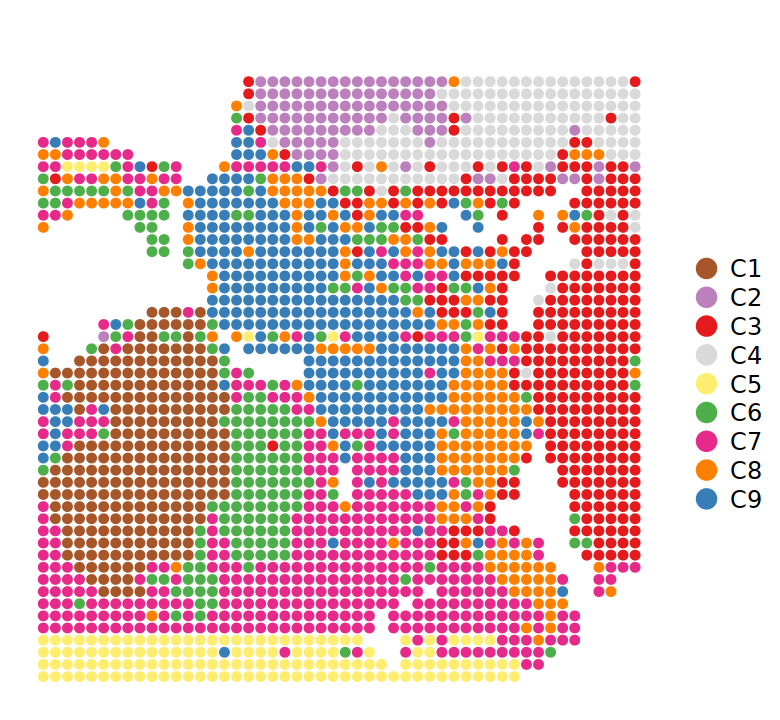

In [10]:

p <- spatPlot(gobject = gio, point_size = 2, title = "",
               cell_color = 'cluster',legend_text = 14,legend_symbol_size = 5,
               #cell_color_code = annot_cols, 
               point_shape = "no_border", 
               show_plot =F)

p = p + theme(panel.border = element_blank(),
            axis.text= element_blank(),
            axis.ticks = element_blank(),
            axis.title = element_blank(),
            plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
            legend.text = element_text(size =rel(1.3), colour = 'black'))

options(repr.plot.width = 6.5, repr.plot.height = 6)
p
#f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/00.MS_figures/1B.wnn_spatial.pdf"
#pdf(f, width = 7, height = 4.5)
#p 
#dev.off()


# Annotation

In [31]:
# marker_dotplot
geneMeta <- function(gobject,
                     expression_values = 'normalized',
                     metadata_cols = NULL,
                     selected_genes = NULL,
                     detection_threshold = 1
){
  expr_data = Giotto:::select_expression_values(gobject = gobject,values = expression_values)
  expr_values = expr_data[rownames(expr_data) %in% selected_genes, ]
  
  metadata = data.table::copy(pDataDT(gobject))
  metadata[, uniq_ID := get(metadata_cols)]
  possible_groups = unique(metadata[,metadata_cols, with = F])
  possible_groups[, uniq_ID := get(metadata_cols)]
  
  ## summarize unique groups (average expression and pct)
  genemata = data.table::data.table()
  for(row in 1:nrow(possible_groups)) {
    
    uniq_identifiier = possible_groups[row][['uniq_ID']]
    selected_cell_IDs = metadata[uniq_ID == uniq_identifiier][['cell_ID']]
    sub_expr_values = expr_values[, colnames(expr_values) %in% selected_cell_IDs]
    if(is.vector(sub_expr_values) == FALSE) {
      subvec = rowMeans(sub_expr_values)
    } else {
      subvec = sub_expr_values
    }
    subvec = round(subvec, 4)
    cell_num = dim(sub_expr_values)[2]
    pct = apply(sub_expr_values, 1, function(x) n = round(length(x[x > detection_threshold])/cell_num, 4))
    pct = pct[names(subvec)]
    
    meta = data.table::data.table(gene_ID = names(subvec), aver_expr = subvec, pct = pct,
                                  meta_col = rep(uniq_identifiier, length(subvec)))
    genemata = rbind(genemata, meta)
  }
  return(genemata)
}


In [6]:
annot_order = c("Heart","Liver","Forebrain","Midbrain","Hindbrain","Meninges", "Facial and limb",
                "Cartilage","Spinal cord")

genes = c("Gata6",'Gata4', 'Gata1', 'Foxg1', 'Otx2', 'Ina', 'Pou3f2', 'Foxc2', "Alx4",
          'Col1a1', 'Pitx2')
genemeta = geneMeta(gobject = gio,
                    expression_values = 'raw',
                    #expression_values = 'normalized',
                    metadata_cols = 'annot',
                    selected_genes = genes,
                    detection_threshold = 0.5)
head(genemeta)

gene_ID,aver_expr,pct,meta_col
<chr>,<dbl>,<dbl>,<fct>
Col1a1,1.0269,0.6979,Cartilage
Foxg1,0.1887,0.1259,Cartilage
Otx2,0.2203,0.1281,Cartilage
Gata4,0.4775,0.3661,Cartilage
Gata6,0.7507,0.4828,Cartilage
Ina,0.2891,0.2105,Cartilage


png 
  2

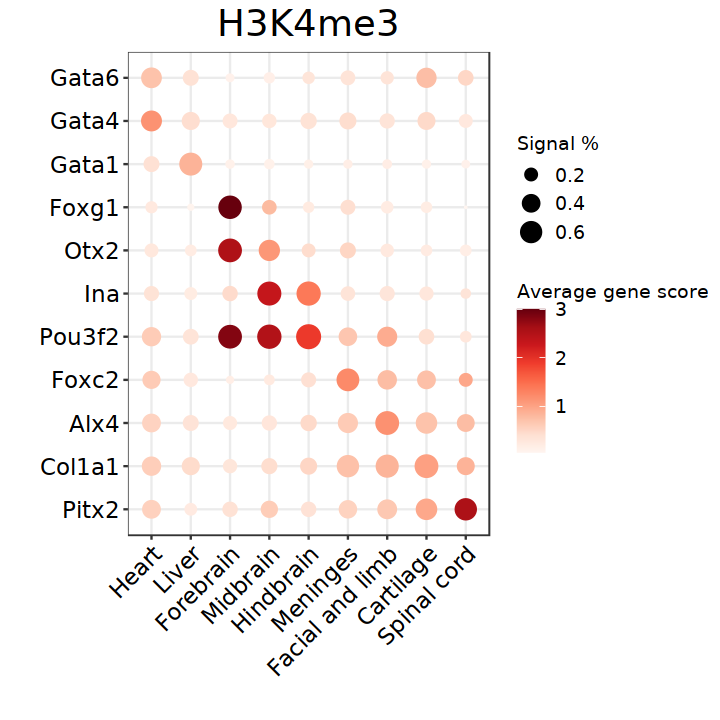

In [7]:
# plot dot
dt = data.table::copy(genemeta)
aver_max = 3
dt[dt$aver_expr > aver_max]$aver_expr = aver_max

p = ggplot(dt, aes(x = factor(meta_col,levels = annot_order),
                    y = factor(gene_ID, levels = rev(genes)),
                    color = aver_expr, size=pct))
p = p + geom_point()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(size =rel(1.5), colour = 'black', 
                                           angle = 45, hjust = 1, vjust=1,
                                           #face = "bold"
                                         ),
                axis.text.y = element_text(size =rel(1.5),colour = 'black',
                                           #face = "bold"
                                           ),
                axis.title.x = element_text(size =rel(1.5), colour = 'black'),
                axis.title.y = element_text(size =rel(1.5), colour = 'black'),
                plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
                legend.text = element_text(size =rel(1), colour = 'black'),
                legend.title = element_text(size =rel(1), colour = 'black'))
p = p + labs(x = "", y = "",title= "H3K4me3",
               color = 'Average gene score',
               size = 'Signal %')
p = p + scale_size(range = c(0,6))
p = p + scale_colour_gradientn(colours = c(RColorBrewer::brewer.pal(9,"Reds")))
options(repr.plot.width=6, repr.plot.height=6)
p

f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/00.MS_figures/20230605_v3/1B.marker_dotplot.pdf"
pdf(f, width = 5, height = 4.5)
p
dev.off()

In [ ]:
# annotation table
annot_dt = data.table(cluster = c('C1','C2','C3','C4','C5','C6','C7','C8','C9'),
                      annot = c("Liver", "Forebrain", "Hindbrain", "Midbrain", "Spinal cord",
                                "Heart", "Cartilage", "Meninges", "Facial and limb"))
gio@cell_metadata = data.table::merge.data.table(gio@cell_metadata, annot_dt, by= "cluster", sort = FALSE)
head(gio@cell_metadata)

annot_order = c("Heart","Liver","Forebrain","Midbrain","Hindbrain","Meninges", "Facial and limb",
                "Cartilage","Spinal cord")
gio@cell_metadata[, annot := factor(annot, annot_order)]

png 
  2

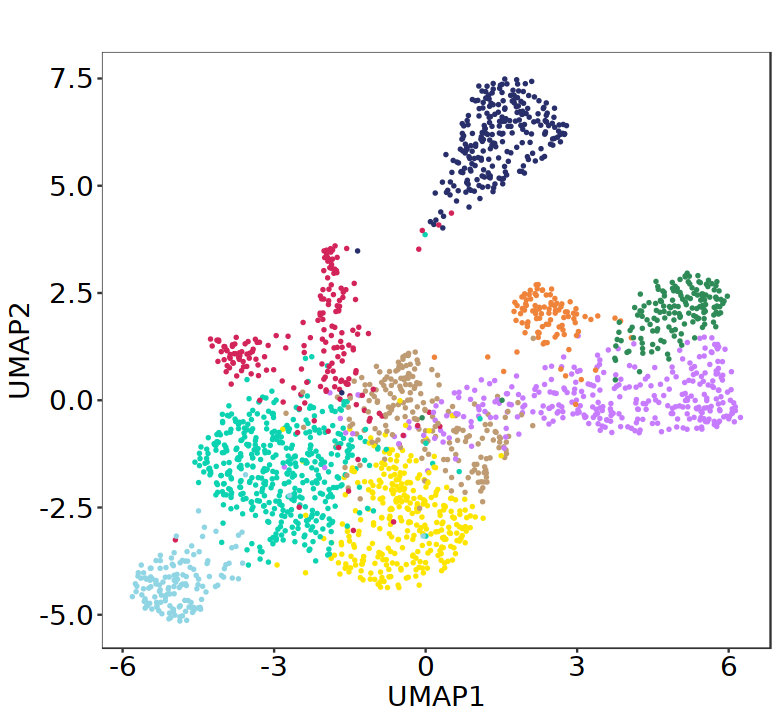

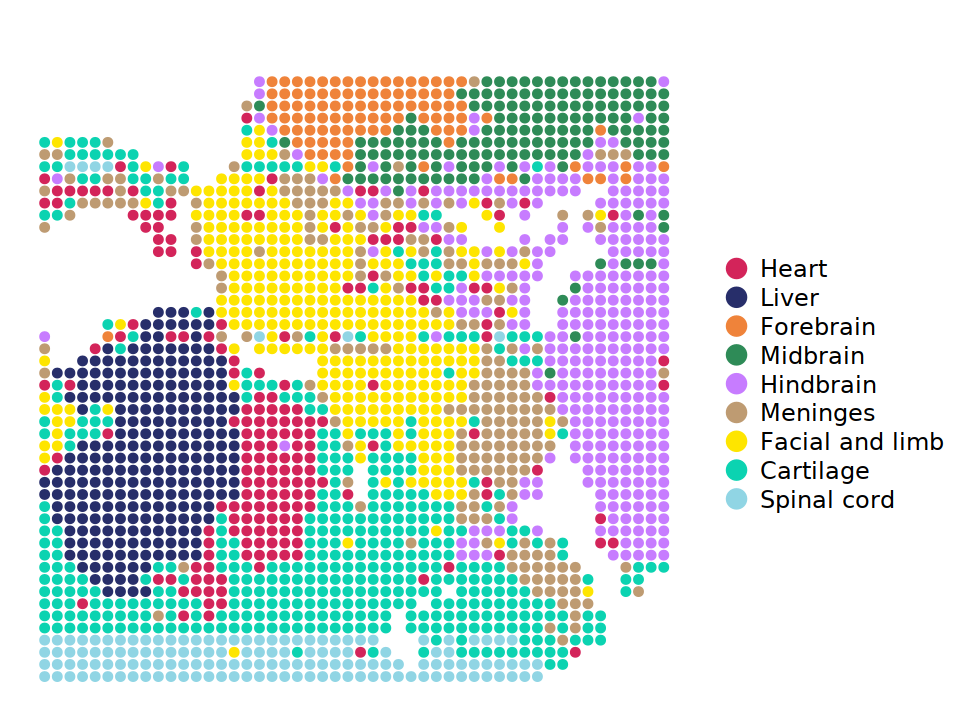

In [33]:


# set color mode
annot <- c("Meninges", "Facial and limb", "Midbrain", "Hindbrain", "Liver",
           "Cartilage","Forebrain", "Heart", "Spinal cord")
annot_cols <- c("#be9b72ff", "#FEE500", "SeaGreen", "#C77CFF", "#272E6A", 
                "#0bd3b1ff","#ef833aff", "#d3245aff", "#90D5E4")
names(annot_cols) =  annot 

# plot UMAP
dt = gio@cell_metadata
p <- ggplot(dt, aes(x = IterativeLSI_3.UMAP_Dimension_1, 
                    y = IterativeLSI_3.UMAP_Dimension_2, 
                    colour = factor(annot))) 
p <- p + geom_point(size=0.5) 
p = p + theme_bw()
p <- p + labs(x="UMAP1",y="UMAP2", title="") 
p <- p + scale_color_manual(values = annot_cols)
p <- p + theme(axis.text = element_text(size =rel(1.5), colour = 'black'),
               axis.title = element_text(size =rel(1.5), colour = 'black'),
               plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
               legend.text = element_text(size =rel(1.5), colour = 'black'),
               legend.title = element_blank(),
               panel.grid = element_blank(),
               panel.background = element_blank(),
               legend.position = "null"
) 
options(repr.plot.width = 6.5, repr.plot.height = 6)
p
f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/00.MS_figures/20230605_v3/1A.umap.new.pdf"
pdf(f, width = 5, height = 5)
p 
dev.off()


# spatial plot
p1 <- spatPlot(gobject = gio, point_size = 2, title = "",
               cell_color = 'annot',legend_text = 14,legend_symbol_size = 5,
               cell_color_code = annot_cols, 
               point_shape = "no_border", 
               show_plot =F)

p1 = p1 + theme(panel.border = element_blank(),
           axis.text= element_blank(),
           axis.ticks = element_blank(),
           axis.title = element_blank(),
           plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
           legend.text = element_text(size =rel(1.3), colour = 'black'))
options(repr.plot.width = 8, repr.plot.height = 6)
p1

f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/00.MS_figures/20230605_v3/1A.SpatPlot.pdf"
#pdf(f, width = 6, height = 4.3)
#p1 
#dev.off()


In [30]:
a = gio@cell_metadata[,.(cluster,cell_ID,IterativeLSI_3.UMAP_Dimension_1, IterativeLSI_3.UMAP_Dimension_2, annot.x)]
data.table::setnames(a, old="annot.x", new = "annot")
gio@cell_metadata = a

# Create spatial network

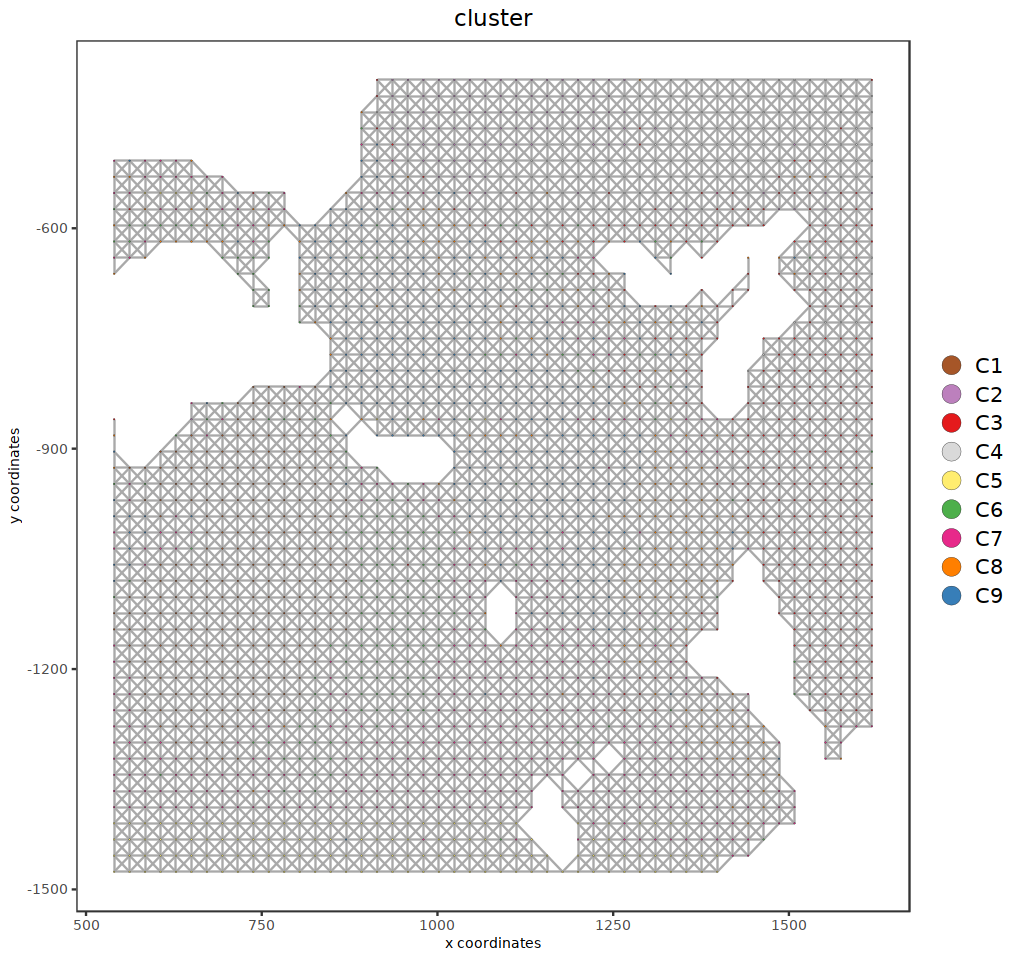

In [12]:
gio= createSpatialNetwork(gobject = gio, method = 'kNN',
                          minimum_k = 0, k=10, maximum_distance_knn = 40)

options(repr.plot.width = 8.5, repr.plot.height = 8)

spatPlot(gobject = gio, show_network = T,
         network_color = 'Darkgrey', spatial_network_name = 'kNN_network',
         point_size = 0.1, cell_color = 'cluster', 
         legend_text = 12, legend_symbol_size = 5,show_plot =F)

# Spatial genes identified

In [14]:
spatialgenes_bS = binSpect(gio,
                           expression_values = "normalized",
                           spatial_network_name = 'kNN_network',
                           calc_hub = TRUE,
                           cores = 10)
data.table::setorder(spatialgenes_bS, adj.p.value)

head(spatialgenes_bS)

saveRDS(spatialgenes_bS, paste0(save_dir,'1.spatialgenes_bS.gs_raw.rds'))


 This is the single parameter version of binSpect
 1. matrix binarization complete 

 2. spatial enrichment test completed 

 3. (optional) average expression of high expressing cells calculated 

 4. (optional) number of high expressing cells calculated 


genes,p.value,estimate,hub_nr,adj.p.value,score,av_expr,high_expr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3110039M20Rik,2.964394e-323,40.97840,73,3.743535e-320,30432.54,3.400371,97
Gm14424,2.964394e-323,25.00391,103,3.743535e-320,18569.11,6.321660,153
C130071C03Rik,2.964394e-323,22.77491,169,3.743535e-320,16913.75,7.008198,207
Tbx5,2.964394e-323,21.41376,116,3.743535e-320,15902.89,3.572669,154
Pitx1,2.964394e-323,19.57691,110,3.743535e-320,14538.76,4.199994,168
Mir9-3,2.964394e-323,18.64477,175,3.743535e-320,13846.51,10.775789,227


# Spatial modules

In [25]:
spatialgenes_bS[,rank := 1:nrow(spatialgenes_bS)]

In [6]:
# select top 250 spatial genes 
gene_num = 200
genes_sel = spatialgenes_bS[1:gene_num]$genes
genes_sel

[1] "3110039M20Rik" "Gm14424"       "C130071C03Rik" "Tbx5"         
  [5] "Pitx1"         "Mir9-3"        "Mir9-3hg"      "Hoxaas3"      
  [9] "Hoxc4"         "Hoxa3"         "Hoxb3"         "Hemgn"        
 [13] "Nfe2"          "Mir142"        "Six2"          "Pnpo"         
 [17] "Hoxa2"         "Hoxaas2"       "Gm15050"       "Mir10b"       
 [21] "Pantr1"        "Dlx6os1"       "Hoxd3"         "Pax3"         
 [25] "Lhx5"          "Gm9949"        "Lmo2"          "Dlx1as"       
 [29] "4930502E09Rik" "Hoxa1"         "Hoxc6"         "Zic4"         
 [33] "Kcnn4"         "D030028A08Rik" "Gypa"          "Gm30731"      
 [37] "Mir451a"       "Mir3093"       "Lhx1"          "Mt1"          
 [41] "Dhrs11"        "Mir124a-2"     "Pou3f2"        "Msx1"         
 [45] "Dlx6"          "Ina"           "Gfi1b"         "Lhx8"         
 [49] "AV026068"      "Tal1"          "Mir124a-1hg"   "Nxpe2"        
 [53] "Adra2b"        "Kel"           "Prrx1"         "Slc4a1"       
 [57] "Alx1"          "Abcb10"        "Zic1"          "Ubac1"        
 [61] "Lhx1os"        "Fech"          "Zc3hav1"       "Cldn13"       
 [65] "Rhd"           "Six1"          "Hoxb2"         "Nr2f1"        
 [69] "Gsc"           "Dlx6os2"       "Ptprn2"        "Alx4"         
 [73] "Tspan32"       "Six3os1"       "Plek2"         "6030468B19Rik"
 [77] "AI606473"      "Foxg1"         "Hand2"         "Ank1"         
 [81] "Pax9"          "Gypc"          "Trak2"         "Nr2f2"        
 [85] "Slc22a4"       "Mir3078"       "Dlx5"          "Apol8"        
 [89] "Emx2os"        "Sptb"          "Emx2"          "Zfpm1"        
 [93] "Mir9-2"        "Hoxb5os"       "Hoxa5"         "Tubb3"        
 [97] "Hoxb4"         "Wt1os"         "Gata4"         "Gm10421"      
[101] "Meis2"         "Nr2e1"         "Gm14204"       "Car2"         
[105] "St3gal5"       "Mir451b"       "Tspo2"         "Myt1l"        
[109] "Tubb2b"        "Slc32a1"       "Nt5c3"         "Tmc8"         
[113] "Hbb-bs"        "Pou3f3"        "Rgcc"          "Hbq1b"        
[117] "Myt1"          "Tmcc2"         "Glra1"         "Hotairm1"     
[121] "Alad"          "Hoxc5"         "5033428I22Rik" "Lamp5"        
[125] "Pax6"          "Tspan33"       "Slc41a3"       "Comt"         
[129] "Wt1"           "Gmpr"          "Gata6"         "Hoxb7"        
[133] "2610027K06Rik" "Dnm3"          "Art4"          "Otx2"         
[137] "Tnfrsf14"      "Slc43a1"       "Sox2ot"        "Hoxa4"        
[141] "Six3"          "G630016G05Rik" "Steap3"        "Mab21l2"      
[145] "Lyl1"          "Tmem14c"       "Mt2"           "Adrb2"        
[149] "Sp8"           "Barx1"         "Gcnt1"         "Hoxa6"        
[153] "Pklr"          "Tmc6"          "Ebf2"          "A830082K12Rik"
[157] "Hbb-b2"        "Fhdc1"         "Lhx2"          "Pdgfra"       
[161] "Otx2os1"       "Pou3f4"        "Adgrg1"        "Onecut2"      
[165] "Epor"          "Mir615"        "Eral1"         "Smim1"        
[169] "2900092D14Rik" "Vamp8"         "Hoxc12"        "Snca"         
[173] "Pitx2"         "Elavl2"        "Lpcat1"        "F930017D23Rik"
[177] "Frrs1"         "Rarg"          "Mab21l1"       "Foxf2"        
[181] "Smim5"         "Noct"          "Rbm38"         "Asb17os"      
[185] "Glrx5"         "Lrba"          "Tbx15"         "Fam210b"      
[189] "Hoxa7"         "Ranbp10"       "Bloodlinc"     "Zic5"         
[193] "Prkar2b"       "Pantr2"        "Vamp5"         "Mir3620"      
[197] "Ptdss2"        "Slc30a10"      "Osr1"          "Foxc2"

In [7]:
# 1. calculate gene spatial correlation and single-cell correlation 
# create spatial correlation object
spat_cor_netw_DT = detectSpatialCorGenes(gio, 
                                         expression_values = "normalized",
                                         method = 'network', 
                                         spatial_network_name = 'kNN_network',
                                         subset_genes = genes_sel)


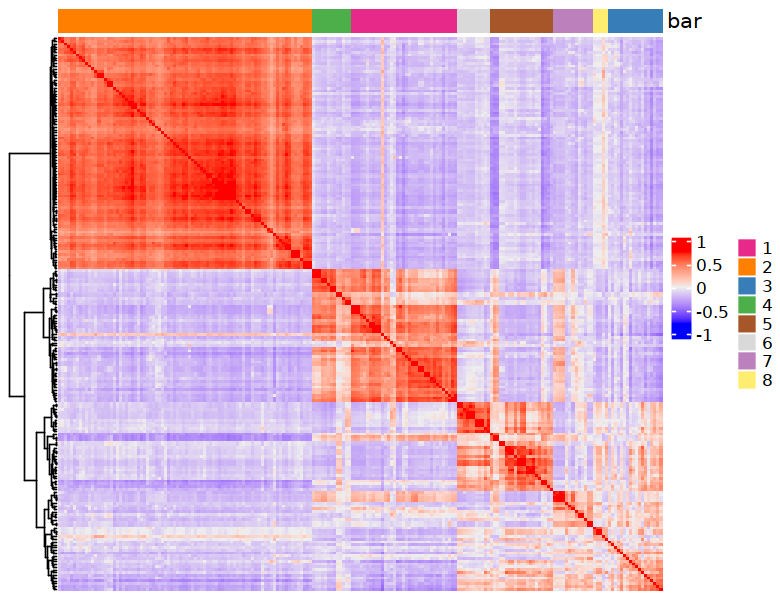


  cluster_metagene  has already been used, will be overwritten 


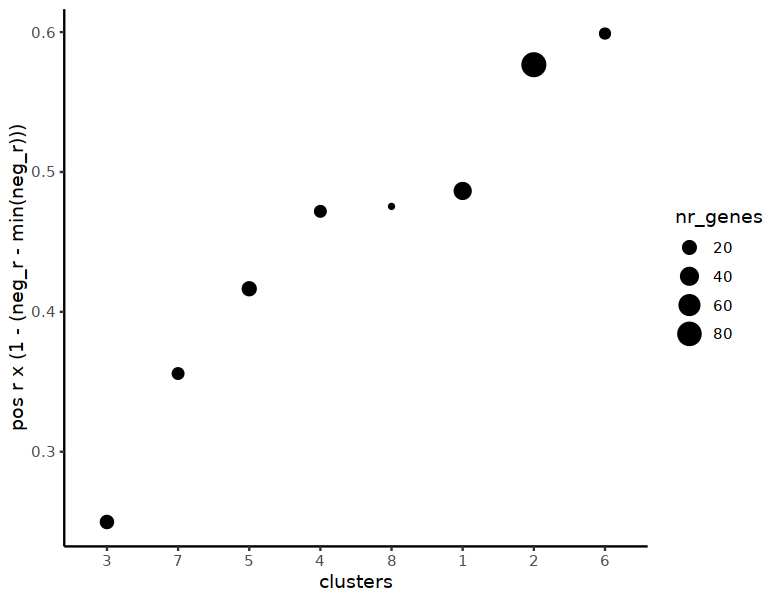

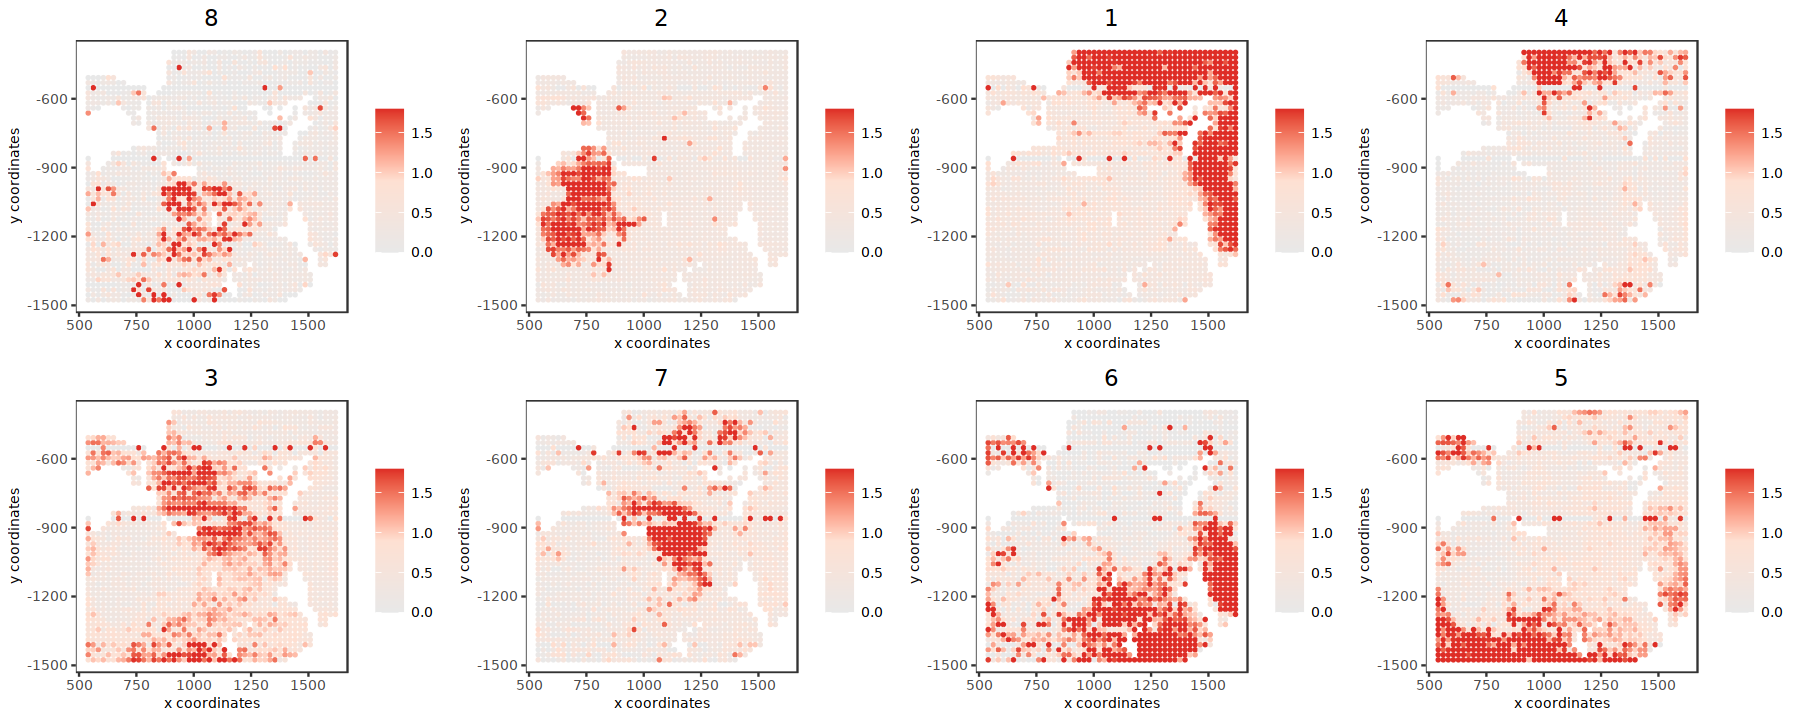

In [8]:
set.seed(1234)

# 2. cluster correlated genes & visualize
#hclust_method: "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA),
#"median" (= WPGMC) or "centroid" (= UPGMC).
# canditate : (complete, 8);(mcquitty, 8) ward.D2
spat_cor_netw_DT_clus = clusterSpatialCorGenes(spat_cor_netw_DT, 
                                               name = 'spat_netw_clus', 
                                               hclust_method = 'ward.D2',
                                               k = 8) 
options(repr.plot.width = 6.5, repr.plot.height = 5)
heatmSpatialCorGenes(gio, spatCorObject = spat_cor_netw_DT_clus, use_clus_name = 'spat_netw_clus',
                     heatmap_legend_param = list(title = NULL))

saveRDS(spat_cor_netw_DT_clus, paste0(save_dir,'2.gs_raw.spat_cor_netw_DT_clus.Top',gene_num,'.rds'))

# 3. rank spatial correlated clusters and show genes for selected clusters
netw_ranks = rankSpatialCorGroups(gio, spatCorObject = spat_cor_netw_DT_clus, 
                                  use_clus_name = 'spat_netw_clus')

# 4. create metagene enrichment score for clusters
cluster_genes = spat_cor_netw_DT_clus$cor_clusters$spat_netw_clus
gio = createMetagenes(gio, expression_values = "normalized",
                      gene_clusters = cluster_genes, name = 'cluster_metagene')

p1 = spatCellPlot(gio,
             spat_enr_names = 'cluster_metagene',
             cell_annotation_values = factor(c(8,2,1,4,3,7,6,5)),
             point_size = 0.5, cow_n_col = 4,
             point_shape = 'no_border', point_border_stroke = 0.1,
             cell_color_gradient = c("grey91","#FEE0D2", "#DE2D26"),
             gradient_midpoint = 0.9, gradient_limits = c(0,1.8),
                show_plot =F)

p1 = p1 + theme(panel.border = element_blank(),
           axis.text= element_blank(),
           axis.ticks = element_blank(),
           axis.title = element_blank(),
           plot.title = element_text(size =rel(2), colour = 'black', hjust = 0.5),
           legend.text = element_text(size =rel(1.3), colour = 'black'))

options(repr.plot.width = 15, repr.plot.height = 6)
p1

png 
  2

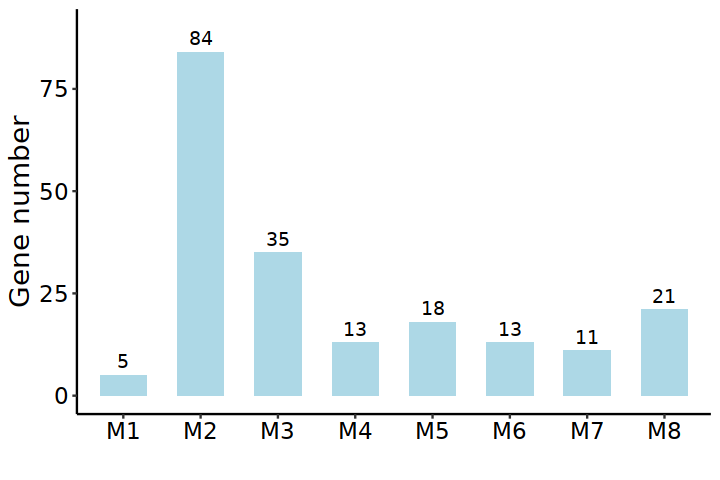

In [63]:
genes_num = data.table::as.data.table(table(cluster_genes))
data.table::setnames(genes_num, new = c("pattern", "N"))
genes_num[, pattern := as.numeric(pattern)]

model_rename_dt = data.table::data.table(pattern = c(8,2,1,4,3,7,6,5),
                                         model = c("M1", "M2", "M3", "M4","M5", "M6", "M7", "M8"))

genes_num = merge.data.table(genes_num, model_rename_dt, by = "pattern")
genes_num[, model := factor(model, levels = c("M1", "M2", "M3", "M4","M5", "M6", "M7", "M8"))]

pl = ggplot(genes_num, aes(x = model, y = N))
pl = pl + geom_bar(stat="identity", width = .6, fill = "lightblue")
pl = pl + theme_classic()
pl = pl + theme(axis.text.x = element_text(size =rel(1.5), colour = 'black'),
                axis.text.y = element_text(size =rel(1.5), colour = 'black'),
                axis.title.x = element_text(size =rel(1.2), colour = 'black'),
                axis.title.y = element_text(size =rel(1.5), colour = 'black'),
                plot.title = element_text(size =rel(2), colour = 'black', hjust = 1),
                legend.text = element_text(size =rel(1), colour = 'black'),
                legend.title = element_text(size =rel(1.2), colour = 'black'),
                panel.grid = element_blank())
pl = pl + labs(
  #title = ' GO Terms of top250 spatial genes',
               x = '',
               y = 'Gene number')
pl = pl + geom_text(mapping = aes(label =genes_num$N),size=4,vjust=-0.5, 
                  hjust=0.5, color="black")
pl = pl + ylim(0,90)

options(repr.plot.width = 6, repr.plot.height = 4)
pl

f = "/sc/arion/projects/YuanLab/gcproj/xuan/01.spatial_omics/00.MS_figures/20230605_v3/S1A.spatial_gene_num.pdf"
pdf(f, width = 5, height = 4)
pl
dev.off()


In [16]:
gene_num = 200
f = paste0(save_dir,'2.gs_raw.spat_cor_netw_DT_clus.Top',gene_num,'.csv')
write.csv(gene_clus_dt, file = f, quote = FALSE, row.names = FALSE)

In [12]:
head(gene_clus_dt)

pattern,gene,model
<int>,<chr>,<chr>
8,Gata4,M1
8,Gata6,M1
8,AV026068,M1
8,Hand2,M1
8,5033428I22Rik,M1
2,Trak2,M2


In [5]:
table(gene_clus_dt$pattern)


 1  2  3  4  5  6  7  8 
35 84 18 13 21 11 13  5 